In [354]:
packages <- c("dplyr","readxl","tidyverse", "bookdown", "car", "ivreg", "sandwich", "rddensity", "rdrobust", "fixest", "Synth", "lubridate", "modelsummary")
package.check <- lapply(packages, FUN = function(x) {
    if (!require(x, character.only = TRUE)) {
        install.packages(x, dependencies = TRUE)
        library(x, character.only = TRUE)
    }
})

In [355]:
df <- read.csv("../data/nishitateno_burke_2020.csv", sep = ";")

In [356]:
first_date <- as.Date("1981-01-01")
last_date <- as.Date("2015-12-01")
# create a table with all the dates between first_date and last_date and the absolute number of months starting at 252
dates <- data.frame(
  y_date = seq(first_date, last_date, by = "month"),
  y_month = seq(252, 671, by = 1)
)
dates

y_date,y_month
<date>,<dbl>
1981-01-01,252
1981-02-01,253
1981-03-01,254
1981-04-01,255
1981-05-01,256
1981-06-01,257
1981-07-01,258
1981-08-01,259
1981-09-01,260


In [357]:
df <- merge(dates, df, by = "y_month", all.x = TRUE)

In [358]:
# get the actual value from the log of nnd
df$average_ndd <- exp(df$lnaverage_ndd) %>% round(2)

In [406]:
head(df)

,y_month,y_date,lnaverage_ndd,lnhmax_ndd,treatment_effects,temp,precip,wind,daylight,snow,cloud,treatment1992,m_code,dabove_nd,average_ndd,month,year
,<dbl>,<date>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,252,1981-01-01,3.044523,4.094345,0,-4.9,162.0,1.5,134.3,273,7.3,0,1101080,0,21,1,1981
2,252,1981-01-01,3.465736,4.605170,0,3.9,6.0,2.4,222.4,0,3.0,1,12204520,0,32,1,1981
3,252,1981-01-01,3.610918,4.382027,0,4.4,3.5,3.5,233.4,0,2.9,1,13112510,0,37,1,1981
4,252,1981-01-01,3.091043,4.700480,0,4.4,3.5,3.5,233.4,0,2.9,1,11214030,0,22,1,1981
5,252,1981-01-01,3.784190,4.700480,0,4.4,4.0,2.2,218.0,0,2.9,1,14101520,2,44,1,1981
6,252,1981-01-01,3.610918,4.605170,0,4.4,3.5,3.5,233.4,0,2.9,1,13108520,0,37,1,1981


In [359]:
# mean of lnaverage_ndd
nnd_graph <- df %>% 
    group_by(y_date, treatment_effects) %>%
    summarize(average_ndd_mean = mean(average_ndd))

`summarise()` has grouped output by 'y_date'. You can override using the
`.groups` argument.


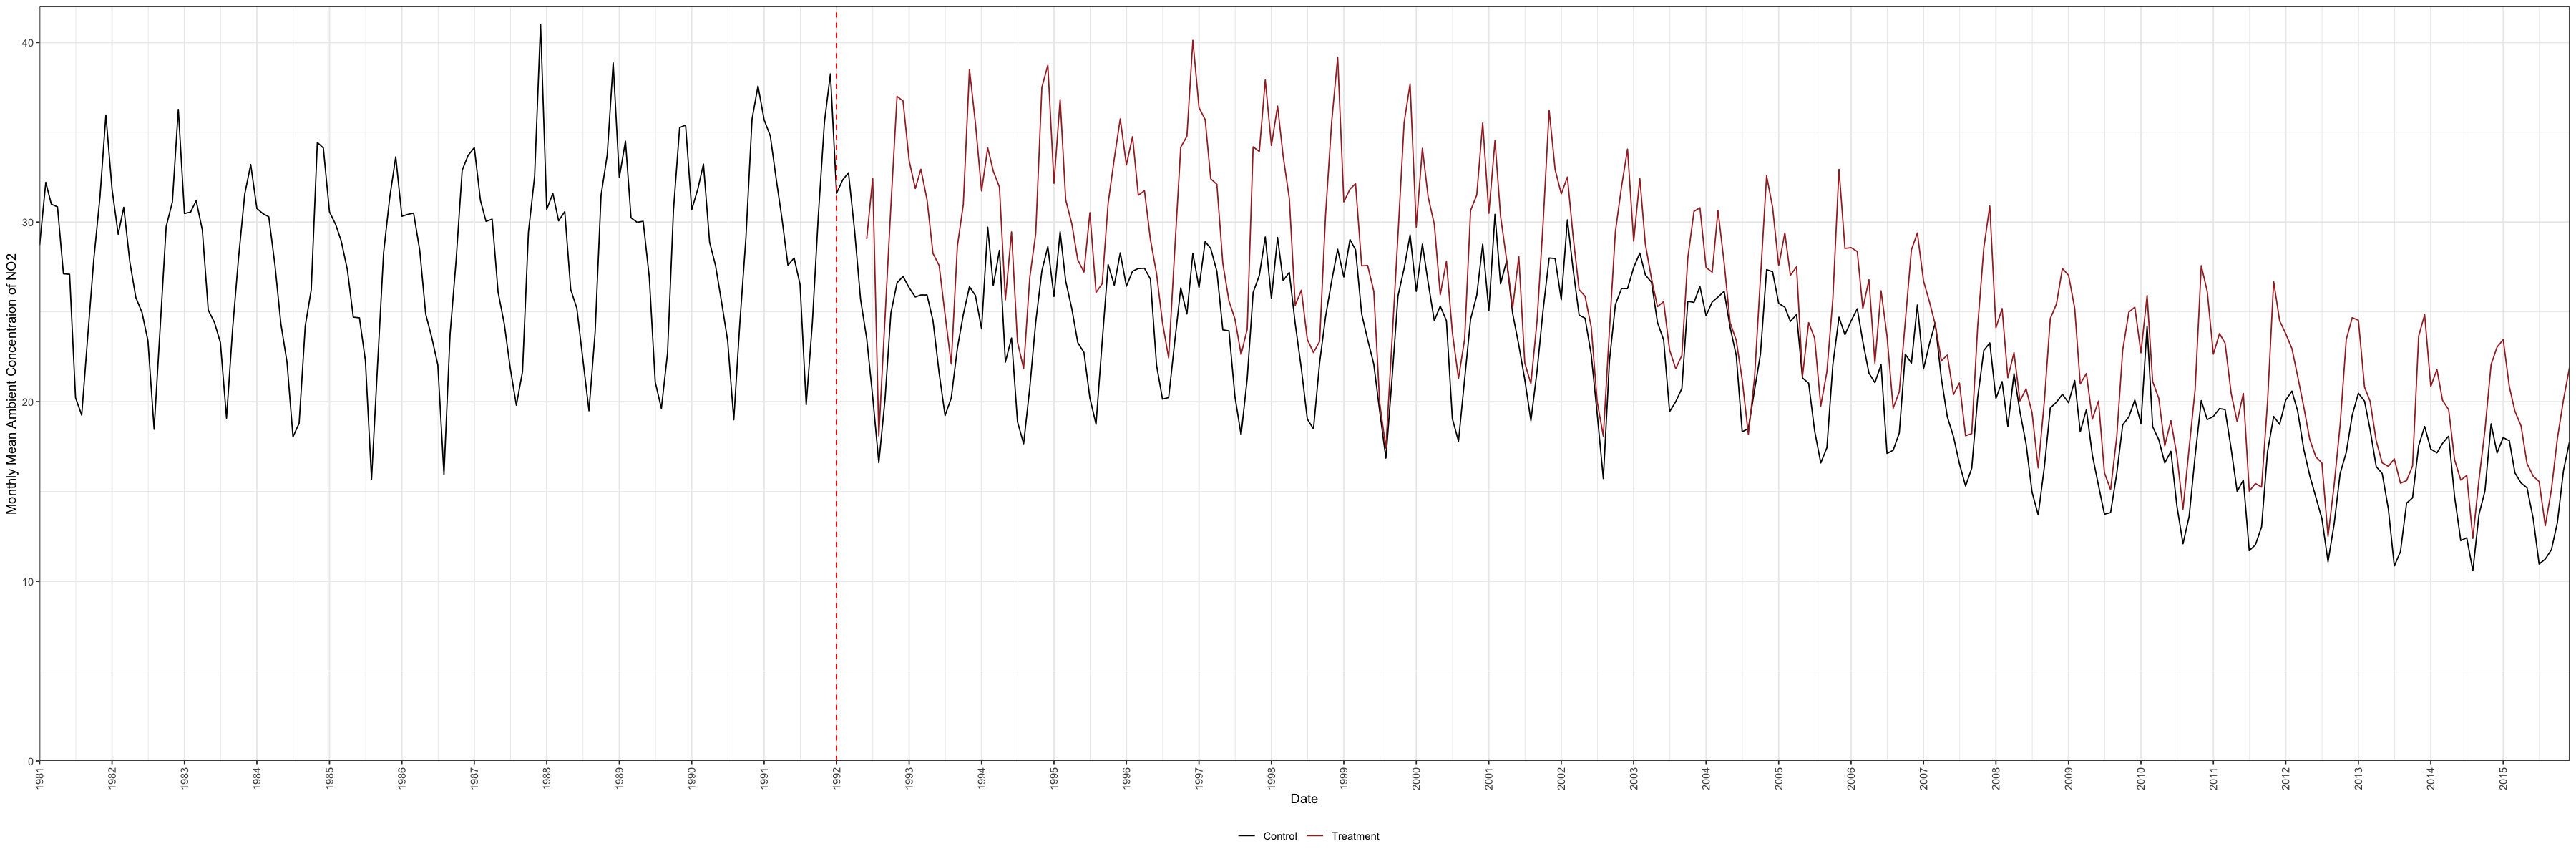

In [360]:
options(repr.plot.width=30, repr.plot.height=10)
ggplot(data = nnd_graph, 
       mapping = aes(y=average_ndd_mean,
                    x=y_date,
                    color=factor(treatment_effects))) +
  geom_line(size = 0.5) +
  guides(color = guide_legend(title = element_blank())) +
  scale_color_manual(labels = c("Control", "Treatment"), 
                     values = c("black", "brown")) +
  labs(x = "Date", y = "Monthly Mean Ambient Concentraion of NO2") +
  # add each year y_date as year label
  scale_x_date(date_breaks = "1 year", date_labels = "%Y", expand = c(0, 0)) +
  # scale y axis from 0 to 50
  scale_y_continuous(limits = c(0, 42), expand = c(0,0)) +
  # add a vertical line at year 1992
  geom_vline(xintercept = as.Date("1992-01-01"), linetype = "dashed", color = "red") +
  theme_bw() + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), legend.position = "bottom")

In [361]:
# add month and year column
df$month <- month(df$y_date)
df$year <- year(df$y_date)

In [362]:
head(df)

,y_month,y_date,lnaverage_ndd,lnhmax_ndd,treatment_effects,temp,precip,wind,daylight,snow,cloud,treatment1992,m_code,dabove_nd,average_ndd,month,year
,<dbl>,<date>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,252,1981-01-01,3.044523,4.094345,0,-4.9,162.0,1.5,134.3,273,7.3,0,1101080,0,21,1,1981
2,252,1981-01-01,3.465736,4.605170,0,3.9,6.0,2.4,222.4,0,3.0,1,12204520,0,32,1,1981
3,252,1981-01-01,3.610918,4.382027,0,4.4,3.5,3.5,233.4,0,2.9,1,13112510,0,37,1,1981
4,252,1981-01-01,3.091043,4.700480,0,4.4,3.5,3.5,233.4,0,2.9,1,11214030,0,22,1,1981
5,252,1981-01-01,3.784190,4.700480,0,4.4,4.0,2.2,218.0,0,2.9,1,14101520,2,44,1,1981
6,252,1981-01-01,3.610918,4.605170,0,4.4,3.5,3.5,233.4,0,2.9,1,13108520,0,37,1,1981


In [400]:
# fixed effects months + Monitor fixed effects (225 - m_code)
model1 <- feols(fml = lnaverage_ndd ~ treatment_effects * treatment1992 | month + m_code, data = df)
# fixed effects months + Monitor fixed effects + Weather variables
model2 <- feols(fml = lnaverage_ndd ~ treatment_effects * treatment1992 + temp + precip + daylight + snow + wind + cloud | month + m_code, data = df)

# EXTRA: fixed effects months, weather and Monitor-specific time trends
model3 <- feols(fml = lnaverage_ndd ~ treatment_effects * treatment1992 + temp + precip + daylight + snow + wind + cloud | month * year + m_code, data = df)

# Coefficients of the treatment variable when the pollution variables are measured by
# Hourly maximum
model4 <- feols(fml = lnhmax_ndd ~ treatment_effects * treatment1992 + temp + precip + daylight + snow + wind + cloud | month + m_code, data = df)
hourly_max <- coef(summary(model4))[["treatment_effects"]]
hourly_max
etable(model1, model2, model3, title = "Estimated Effects of Designation under the ANCL on Air Pollution")

The variables 'treatment1992' and 'treatment_effects:treatment1992' have been removed because of collinearity (see $collin.var).

The variables 'treatment1992' and 'treatment_effects:treatment1992' have been removed because of collinearity (see $collin.var).

The variables 'treatment1992' and 'treatment_effects:treatment1992' have been removed because of collinearity (see $collin.var).

The variables 'treatment1992' and 'treatment_effects:treatment1992' have been removed because of collinearity (see $collin.var).



[1] -0.1651359

,,model1,model2,model3
,<chr>,<chr>,<chr>,<chr>
1,Dependent Var.:,lnaverage_ndd,lnaverage_ndd,lnaverage_ndd
2,,,,
3,treatment_effects,-0.1288*** (0.0136),-0.1144*** (0.0154),-0.1280*** (0.0103)
4,temp,,0.0065 (0.0072),0.0168. (0.0078)
5,precip,,-0.0001 (7.32e-5),0.0002. (0.0001)
6,daylight,,-0.0038*** (0.0004),-0.0005. (0.0002)
7,snow,,0.0029*** (0.0004),0.0025*** (0.0003)
8,wind,,-0.0068 (0.0145),-0.0702*** (0.0114)
9,cloud,,-0.1506*** (0.0154),-0.0452** (0.0102)


In [423]:
# treatment group is 109 designated municipalities with 190 monitors
df %>% 
    filter(treatment1992 == 1) %>%
    filter(treatment_effects == 1) %>%
    group_by(m_code) %>%
    summarize(n = n()) %>%
    nrow()

[1] 190

In [ ]:
# treatment group is 109 designated municipalities with 190 monitors
df %>% 
    filter(treatment1992 == 1) %>%
    filter(treatment_effects == 1) %>%
    group_by(m_code) %>%
    summarize(n = n())

m_code,n
<int>,<int>
11202040,282
11203030,276
11203050,272
11204010,281
11205040,282
11205050,283
11206020,279
11210010,283
11214030,282


In [ ]:
# The control group is five non-designated municipalities with 35 monitors.
df %>% 
    filter(treatment1992 == 0) %>%
    filter(treatment_effects == 0) %>%
    group_by(m_code) %>%
    summarize(n = n())

m_code,n
<int>,<int>
1101080,419
1102010,419
1102020,414
1103010,420
1105010,420
1107020,419
1107030,420
4201050,417
4201080,418


In [ ]:
# Hence, the 225 montiors are the m_code
df %>% 
    group_by(m_code) %>%
    summarize(n = n())

m_code,n
<int>,<int>
1101080,419
1102010,419
1102020,414
1103010,420
1105010,420
1107020,419
1107030,420
4201050,417
4201080,418
